In [1]:
%pylab inline

from tools.issag import Sampler, _random_range_, _rejection_
from tools.issag import Models, iSSAG
import pandas as pd
import seaborn as sns
from scipy.stats import norm

sns.set(style="ticks")
np.random.seed(sum(map(ord, "axis_grids")))

Populating the interactive namespace from numpy and matplotlib


In [2]:
# chen = Sampler()

# sample = chen.get_samples(size=100)
# sample = chen.get_samples(size=500, pristine=True)
# sample.insert(loc=2, column="tau", value=1.0/sample.gamma*1e9)
# columns = "t_form tau t_trun tau_trun t_burst t_ext".split()
# sample[columns] = sample[columns].apply(log10)
# sample.head(n=10)

# g = sns.PairGrid(sample, vars=["t_form", "tau", "t_trun", "tau_trun", "t_burst", "t_ext"], diag_sharey=False, dropna=False)
# g.map_upper(plt.scatter, **{"s": 7, "lw": 0})
# g.map_lower(sns.kdeplot, cmap="Blues_d", **{"griddsize": 20, "bw": (0.1, 0.1)})
# g.map_diag(sns.kdeplot, lw=2, legend=False)

In [3]:
%%time
ssag = iSSAG(size=100)
ssag.set_all_seds(emission="both")
# ssag.set_all_sfhs()

CPU times: user 3.21 s, sys: 133 ms, total: 3.34 s
Wall time: 3.37 s


In [4]:
ssag.sample.head(n=10)

,t_form,gamma,truncated,t_trun,tau_trun,t_burst,t_ext,a_burst,metallicity,tau_v,mu_v,sigma_v
0,5.028733e+09,0.611759,True,7.470686e+08,1.045759e+08,3.555919e+09,7.143429e+07,0.081698,1.865246,1.460689,0.789660,251.639621
1,1.310506e+10,0.412182,True,3.210199e+09,1.438020e+07,4.005053e+09,1.406657e+08,0.255682,2.103486,0.338537,0.699786,209.293995
2,5.196083e+09,0.936435,True,2.215349e+09,8.649891e+08,3.036428e+09,2.080790e+08,0.955252,1.290431,0.888650,0.148503,101.939134
3,4.613613e+09,0.049896,False,NaN,NaN,4.533103e+09,2.729935e+08,0.093234,0.687620,2.234097,0.232801,97.742457
4,4.714184e+09,0.642966,False,NaN,NaN,2.762389e+09,1.840979e+08,0.288244,1.366275,1.776811,0.448628,76.748814
5,5.158691e+09,0.948019,True,3.134517e+09,7.846785e+07,3.359299e+09,1.011314e+08,2.842866,0.696512,2.345985,0.717351,334.832722
6,4.946948e+09,0.509188,False,NaN,NaN,2.767382e+09,2.591799e+08,0.357341,1.318360,1.597073,0.101139,90.309998
7,4.801858e+09,0.288338,False,NaN,NaN,2.318746e+09,1.115180e+08,0.533671,1.868838,2.710171,0.393988,98.266542
8,3.742214e+09,0.387118,False,NaN,NaN,2.975770e+09,1.361236e+08,2.901608,0.520152,1.996553,0.317710,324.654019
9,6.763386e+09,0.331318,False,NaN,NaN,2.564843e+09,1.966738e+08,0.103524,1.661341,1.005684,0.215612,382.608067


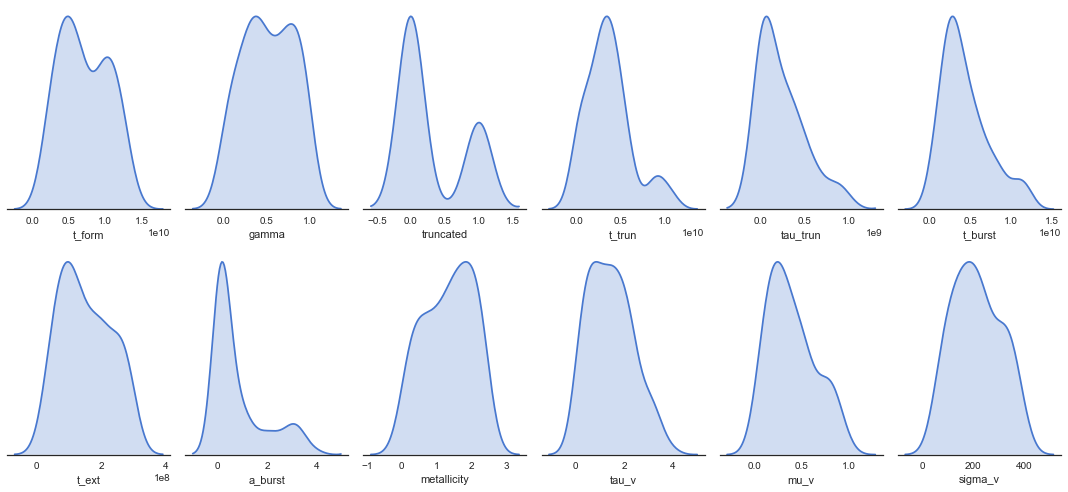

In [5]:
sns.set(style="white", palette="muted", color_codes=True)

fig, axs = subplots(2, 6, figsize=(15, 7))
axs = axs.ravel()
sns.despine(left=True)

for i in xrange(axs.size):
    sns.distplot(ssag.sample.iloc[:,i].dropna(), hist=False, color="b", kde_kws={"shade": True}, ax=axs[i])

plt.setp(axs, yticks=[])
fig.tight_layout()

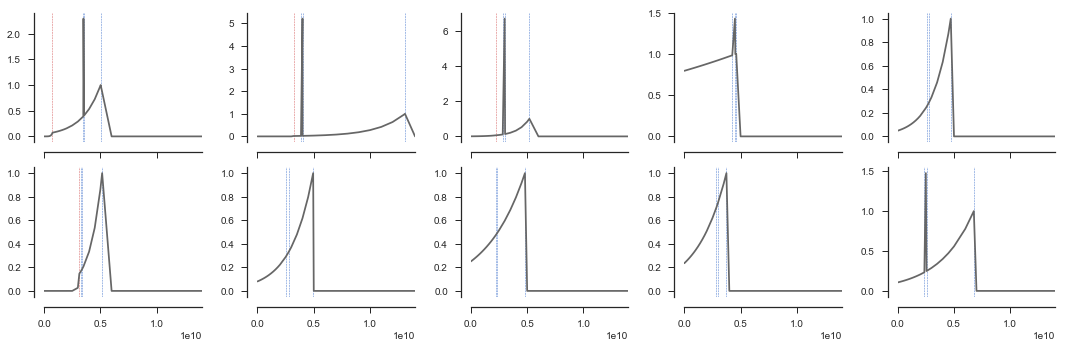

In [6]:
sns.set(style="ticks", palette="muted", color_codes=True)

fig, axs = subplots(2, 5, figsize=(15, 5), sharex=True)
axs = axs.ravel()
sns.despine(offset=10)

for j in xrange(10):
    i = j
    
    axs[j].axvline(ssag.sample.t_form[i], ls="--", lw=0.5)
    axs[j].axvline(ssag.sample.t_burst[i], ls="--", lw=0.5)
    axs[j].axvline(ssag.sample.t_burst[i]-ssag.sample.t_ext[i], ls="--", lw=0.5)
    axs[j].axvline(ssag.sample.t_trun[i], ls="--", lw=0.5, color="r")
    
    ssag.sfhs.iloc[:, i].dropna().plot(ax=axs[j], color="0.4", xlim=(0,14e9))

fig.tight_layout()

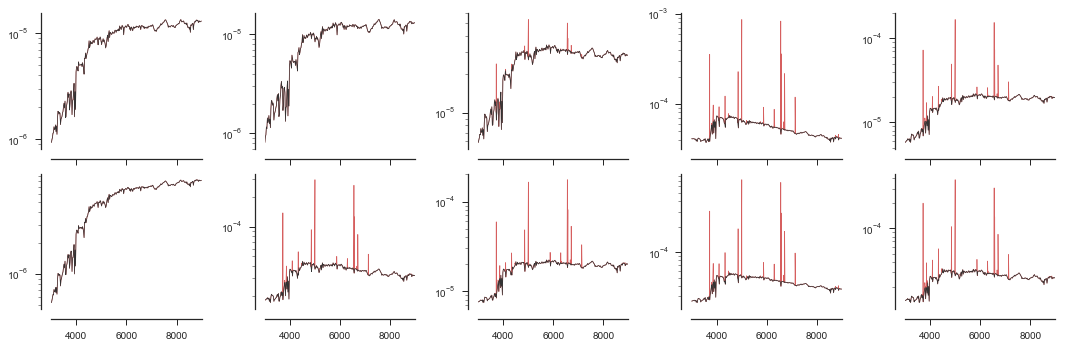

In [7]:
sns.set(style="ticks", palette="muted", color_codes=True)

fig, axs = subplots(2, 5, figsize=(15, 5), sharex=True)
xlim(3000,9000)
axs = axs.ravel()
sns.despine(offset=10)

for i in xrange(10):
    figure()
    if ssag.seds_nebular is not None:
        mask = (3000<=ssag.seds_nebular.index)&(ssag.seds_nebular.index<=9000)
        ssag.seds_nebular[i][mask].plot(ax=axs[i], lw=0.7, color="r", logy=True)
    if ssag.seds_stellar is not None:
        mask = (3000<=ssag.seds_stellar.index)&(ssag.seds_stellar.index<=9000)
        ssag.seds_stellar[i][mask].plot(ax=axs[i], lw=0.7, color="0.2", logy=True)
    
fig.tight_layout()